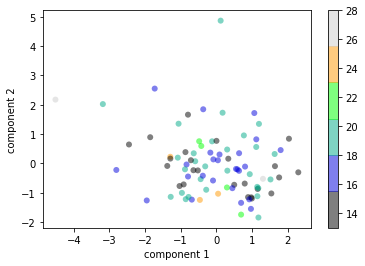

In [120]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df = pd.read_json('data.json')
features = ['time','_f2l1Time','_f2l2Time','_f2l3Time','_f2l4Time','_ollTime','_pllTime','_unknownTime']

# Filters just CFOP solves that had no fail
dy = df.loc[df['isError'] == False]
dy = dy.loc[dy["mode"] == 'cfop']
decimals = 0

dy['time'] = dy['time'].apply(lambda x: x/1000)
dy['time'] = dy['time'].apply(lambda x: int(round(x, decimals)))

x = dy.loc[:, features].values
y = dy.loc[:,['time']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

projected = pd.concat([principalDf, dy.time], axis = 1)

# The following line allows to filter the specific columns
dy = dy[features]

plt.scatter(projected.iloc[:, 0], projected.iloc[:, 1], c=projected.time, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();